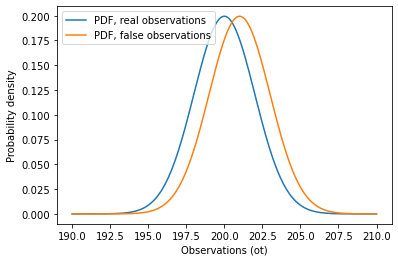

In [39]:
import numpy as np
import pylab as pl
import scipy as sp


#trial 2 change: f 0.1 -> 0.9
#trial 3 change>: f 0.1 -> 0.5
#trial 4 change: mean_false 201 -> 120
#trial 5 change: stdev_false 2 -> 20
mean_real = 200
mean_false = 201
stdev_real = 2
stdev_false = 2
f = 0.5

# graphing probabilities
# def introduces a method
def phi_real(o,mean,stddev):
	return np.exp(-(o-mean)**2/(2*stddev**2))/np.sqrt(2*np.pi*stddev**2)
def phi_false(o,mean,stddev):
    return np.exp(-(o-mean)**2/(2*stddev**2))/np.sqrt(2*np.pi*stddev**2)

# np.linspace defines x axis of line graph; 1000 means 1000 intervals (resolution of plot); 190-210 or 150-250
os = np.linspace(190,210,1000)
# creates placeholder array of zeros to hold y axs values
phirs = np.zeros(len(os))
phifs = np.zeros(len(os))
# fill out y values; no need for brackets, just tabs?
for t in range(len(os)):
	phirs[t] = phi_real(os[t],mean_real,stdev_real)
	phifs[t] = phi_false(os[t],mean_false,stdev_false)

pl.plot(os,phirs, label = "PDF, real observations")
pl.plot(os,phifs, label = "PDF, false observations")
pl.legend(loc = "best")
pl.ylabel("Probability density")
pl.xlabel ("Observations (ot)")
pl.show()

# drawing from above
def generate_environment(T=200,f=f):
    # 1. Randomly decide if we are hallucinating or not
    # 2. If hallucinating, draw an observation from a normal distribution specified by phi_false
    # 3. If not, draw an observation from a normal distribution specified by phi_real
    # 4. add this observation to the list of observations.
    observations = []

    # choose if we are hallucinating or not
    u = np.random.binomial(n=1,p=f,size=T)
    for t in range(T): 
        # do an if statement to "case it out"
        if u[t]==0:
            # draw from real()
            o = np.random.normal(mean_real,stdev_real)
        else:
            # draw from false
            o = np.random.normal(mean_false,stdev_false)
        observations.append(o)
    return observations, u
observations, u = generate_environment(T = 1000)

In [40]:
o = observations
print(phi_real(np.asarray(o),mean_real,stdev_real))
print(phi_false(np.asarray(o),mean_false,stdev_false))


357897e-02
 1.91959409e-01 1.34696897e-01 1.20343976e-01 1.65352395e-01
 1.99225380e-01 1.44734701e-01 1.42505117e-01 2.78418766e-02
 8.02020778e-02 1.68461699e-01 1.57251551e-01 1.99138939e-01
 1.44384283e-01 1.53158807e-01 5.71030318e-02 4.14836515e-02
 1.67565265e-01 1.89980384e-01 1.42163172e-01 1.92064289e-01
 1.71309572e-01 8.16840042e-02 1.99157057e-01 1.79020149e-01
 1.92626180e-01 1.93229172e-01 1.43306585e-01 1.75400836e-01
 3.86262463e-02 5.54067667e-02 1.89655762e-01 1.66555801e-01
 1.75437834e-01 1.32992360e-01 1.91686746e-01 1.86035789e-01
 1.87235228e-01 1.96176934e-01 1.78156306e-01 1.17307230e-01
 1.67649544e-01 1.99066207e-01 1.98588486e-01 1.60018994e-01
 1.27966309e-01 1.59890260e-01 1.64394490e-01 1.57251098e-01
 1.79355042e-01 1.26234581e-01 1.99437814e-01 6.40846589e-02
 1.99450875e-01 1.59100101e-01 2.93109910e-02 7.51965346e-02
 1.96016930e-01 1.43135747e-01 1.97333799e-01 1.97480707e-01
 1.32031820e-01 1.91763724e-01 1.90596970e-01 1.73363650e-01
 6.60421612e-

In [41]:
def classify(observations):
    #define observations
    o = observations
    #define f 
    #f = 0.1
   #for each observation calculate L
    L = (1-f)*phi_real(np.asarray(o),mean_real,stdev_real)/(f*phi_false(np.asarray(o),mean_false,stdev_false))
    #print L
    return L>1
 







Text(0, 0.5, 'Frequency')

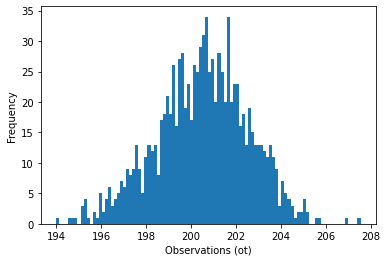

In [42]:
pl.hist(observations, 100)
pl.xlabel("Observations (ot)")
pl.ylabel("Frequency")


In [43]:
print(u)

#count the reals
u2 = u[u == 0]
print(u2.size)

[1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0
 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 1 0 1 

In [44]:
#determine # of errors
from sklearn.metrics import accuracy_score

def acc_rate(y_pred = classify(observations)):
    y_true = u
    accuracy_score(y_true, y_pred)
    foo = accuracy_score(y_true, y_pred, normalize=False)
    return 100-(100*foo/1000)
#foo is the inverse of what it should be because u_real represented as 0, while c_real represented as True; accuracy counts discrepancies of u, c
print(acc_rate())




56.6


In [45]:
c = classify(observations)
obs_real = np.asarray(observations)[c]
obs_false = np.asarray(observations)[~c] 

#print(len(obs_real)+len(obs_false)) gives 1000, no data points left out

In [46]:
print(c)
#count "judged as real"
print(c[c == True].size)

[ True  True  True False  True  True False  True  True  True  True False
 False False False False False  True False  True  True  True  True False
 False False False False  True  True  True False False False  True False
 False  True False  True False False False  True False False False False
 False  True  True  True  True  True False  True False False False  True
 False False  True  True  True False False  True  True False  True False
 False  True  True False False False  True False False  True False False
 False  True False  True False  True False False False  True False False
  True  True  True False False  True  True  True  True  True  True  True
  True False False  True False  True False False False False  True False
  True False False False  True  True False  True False False  True  True
 False False False False False  True False False  True  True False False
  True  True  True  True False False  True  True False False False  True
  True  True False False  True False False False Fa

Text(0.5, 0, 'Observations (ot)')

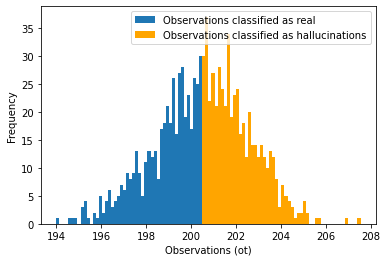

In [47]:
import pylab as pl
# import pandas as pd


if len(obs_real) != 0:
    intervals_r = round(100*(np.ptp(obs_real)/np.ptp(observations)))
    pl.hist(obs_real,intervals_r, label="Observations classified as real")    
if len(obs_false) != 0:
    intervals_f = round(100*(np.ptp(obs_false)/np.ptp(observations)))
    pl.hist(obs_false,intervals_f, label="Observations classified as hallucinations", color = 'orange')

pl.legend(loc="best")
pl.ylabel("Frequency")
pl.xlabel("Observations (ot)")

In [48]:
#classify with suspicion
def classify_s(o):

    results = np.zeros(0, dtype = np.bool)
    for ot in o:
        post_r = (1-f)*phi_real(ot,mean_real,stdev_real)
        post_f = f*phi_false(ot,mean_false,stdev_false) 
        L = post_r/post_f

        #print(post_r)
        #print(post_f)

        #no room for suspicion
        if (post_r <= 0.001 or post_f <= 0.001):
            results = np.append(results,L>1)

        #room for suspicion    
        else:
            #size = 1 means s is array of size 1 (we are repeating 1 trial 1 time)
            s = np.random.binomial(n=1,p=f,size=1)
            if(s != 0):
                results = np.append(results,L<1)
            else:
                results = np.append(results,L>1)
    #print(type(results[0]))
    return results
c_s = classify_s(observations)

Text(0.5, 0, 'Observations (ot)')

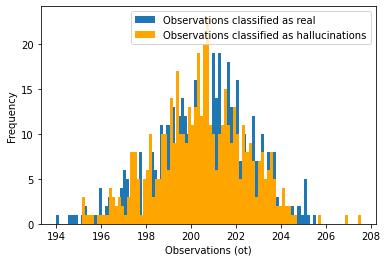

In [49]:
import pylab as pl
model_real = np.asarray(observations)[c_s]
#print(obs_real,model_real)
model_false = np.asarray(observations)[~c_s]
#print(len(model_real),len(model_false))

if len(model_real) != 0:
    intervals_r = round(100*(np.ptp(model_real)/np.ptp(observations)))
    pl.hist(model_real,intervals_r, label="Observations classified as real")    
if len(model_false) != 0:
    intervals_f = round(100*(np.ptp(model_false)/np.ptp(observations)))
    pl.hist(model_false,intervals_f, label="Observations classified as hallucinations", color = 'orange')

pl.legend(loc="best")
pl.ylabel("Frequency")
pl.xlabel("Observations (ot)")

In [50]:
print("ur ",len(u[u==0])," cr ",len(c[c==1]))
print(acc_rate())
#print(len(u[u==0]),len(c_s[c_s==1]))
#print(acc_rate(c_s))

#true positive
def tpr(c = c):
    cr = u[c]
    #print(len(cr))
    ur_cr  = cr[cr == 0]
    return len(ur_cr)/len(u[u == 0])
#false positive
def fpr(c = c):
    cr = u[c]
    #print(len(cr))
    uf_cr  = cr[cr == 1]
    return len(uf_cr)/len(u[u == 1])
#false negative
def fnr(c = c):
    cf = u[~c]
    ur_cf  = cf[cf == 0]
    return len(ur_cf)/len(u[u == 0])
print (tpr(), fpr(), fnr())
#print (tpr(c_s), fpr(c_s), fnr(c_s))

ur  498  cr  478
56.6
0.5441767068273092 0.4123505976095618 0.45582329317269077
